In [2]:
%cd /home/plent/Documenten/Gitlab/NeuralODEs/jax_neural_odes

from source.load_sbml.sbml_load import *
from source.load_sbml.sbml_model import SBMLModel
jax.config.update("jax_enable_x64", True)
from source.utils import get_logger
from source.parameter_estimation.initialize_parameters import *
import optax
from source.parameter_estimation.training import *
import time
import argparse
from source.parameter_estimation.jacobian import *


/home/plent/Documenten/Gitlab/NeuralODEs/jax_neural_odes


17:54:11,221 - source.load_sbml.sbml_model - INFO - No internal inconsistencies found
17:54:11,222 - source.load_sbml.sbml_model - INFO - Model loaded.
17:54:11,222 - source.load_sbml.sbml_model - INFO -  number of species: 3
17:54:11,223 - source.load_sbml.sbml_model - INFO -  number of reactions: 8
17:54:11,224 - source.load_sbml.sbml_model - INFO -  number of global parameters: 24
17:54:11,224 - source.load_sbml.sbml_model - INFO -  number of constant boundary metabolites: 0
17:54:11,225 - source.load_sbml.sbml_model - INFO -  number of lambda function definitions: 0
17:54:11,225 - source.load_sbml.sbml_model - INFO -  number of assignment rules: 1
17:54:11,255 - source.load_sbml.sbml_load - INFO - Jacobian Compiled


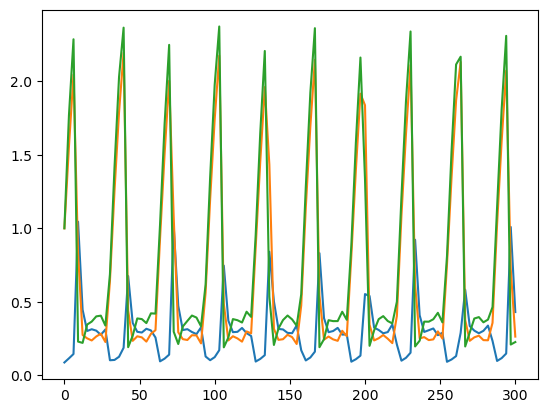

In [9]:
model_name="Borghans_BiophysChem1997.xml"
filepath="models/sbml_models/working_models/"+model_name
model=SBMLModel(filepath)
jacobian_object=Jacobian(model)
logger.info("Jacobian Compiled")
compiled_jacobian=jacobian_object.compile_jacobian()


JaxKmodel = model.get_kinetic_model()
JaxKmodel = jax.jit(JaxKmodel)
# #parameters are not yet defined
params = get_global_parameters(model.model)
params = {**model.local_params, **params}
ts=jnp.linspace(0,300,100)
ys=JaxKmodel(ts,model.y0,params)

plt.plot(ts,ys)


In [18]:
global_params,local_params=separate_params(params)
eigvals=jnp.linalg.eigvals(compiled_jacobian(ys[23,:],global_params=global_params,local_params=local_params))

eigvals

# so from this data you would easily see that you need to be between a period of 2 and 3

# lb=0.99
# ub=1.01
# bounds=generate_bounds(params,lower_bound=lb,upper_bound=ub)
# # uniform_parameter_initializations=uniform_sampling(bounds,N)
# lhs_parameter_initializations=latinhypercube_sampling(bounds,30000)

# jacobian_object.filter_oscillations(compiled_jacobian,model.y0,lhs_parameter_initializations,period_bounds=[1.5,4])

Array([-6.71135275+0.j, -1.95268029+0.j, -0.33259393+0.j], dtype=complex128)